In [1]:
import os
os.chdir('C:\\Users\\mdishakk\\Downloads')


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=5)
kmeans = kmeans.fit(df[['Spending Score (1-100)','Annual Income (k$)']])

In [5]:
kmeans.cluster_centers_

array([[17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ]])

In [13]:
df['income_clusters']=kmeans.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_clusters
0,1,Male,19,3,39,3
1,2,Male,21,1,81,1
2,3,Female,20,3,6,3
3,4,Female,23,1,77,1
4,5,Female,31,3,40,3
...,...,...,...,...,...,...
195,196,Female,35,2,79,2
196,197,Female,45,0,28,0
197,198,Male,32,2,74,2
198,199,Male,32,0,18,0


In [8]:
df['Annual Income (k$)'].value_counts()


4    81
2    39
0    35
3    23
1    22
Name: Annual Income (k$), dtype: int64

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

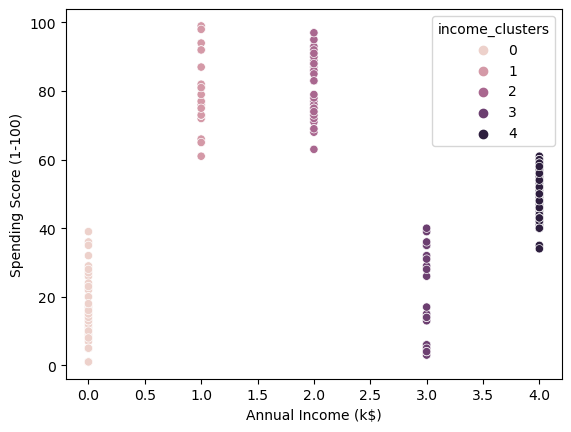

In [15]:
df.rename(columns={'Annual Income (k$)':'income'})
import seaborn
%matplotlib inline 
seaborn.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='income_clusters',data=df)